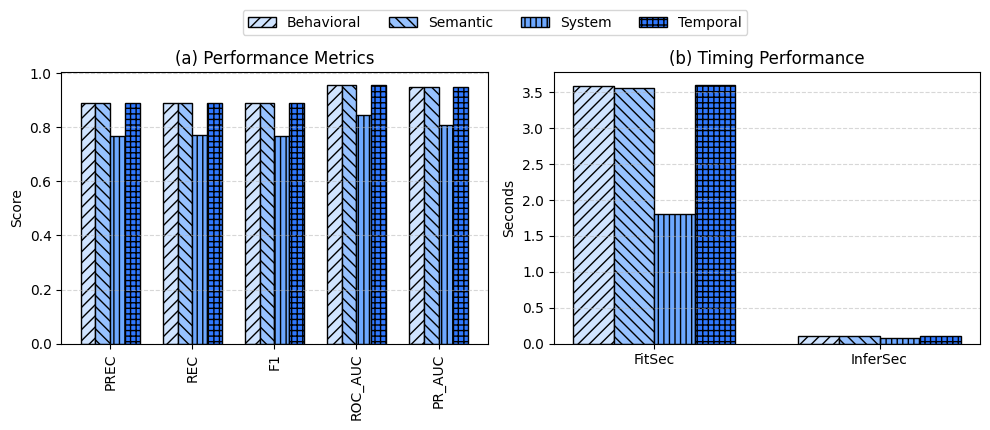

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Full data
data = {
    "Feature": ["Behavioral"]*5 + ["System"]*5 + ["Semantic"]*5 + ["Temporal"]*5,
    "Fold": list(range(1,6))*4,
    "FitSec":[3.5615,3.6025,3.5112,3.6757,3.5649,
              1.8074,1.7811,1.8526,1.7998,1.8100,
              3.4813,3.6335,3.5148,3.6301,3.5612,
              3.5390,3.6276,3.5728,3.6364,3.6071],
    "InferSec":[0.1052,0.1087,0.1043,0.1053,0.1049,
                0.0716,0.0709,0.0839,0.0705,0.0720,
                0.1046,0.1085,0.1055,0.1164,0.1049,
                0.1045,0.1068,0.1042,0.1053,0.1060],
    "PREC":[0.8988,0.8830,0.8847,0.8808,0.8926,
            0.7733,0.7628,0.7492,0.7840,0.7773,
            0.8988,0.8830,0.8847,0.8808,0.8926,
            0.8988,0.8830,0.8847,0.8808,0.8926],
    "REC":[0.8993,0.8830,0.8847,0.8808,0.8926,
           0.7733,0.7632,0.7508,0.7840,0.7773,
           0.8993,0.8830,0.8847,0.8808,0.8926,
           0.8993,0.8830,0.8847,0.8808,0.8926],
    "F1":[0.8991,0.8830,0.8847,0.8808,0.8926,
          0.7733,0.7630,0.7500,0.7840,0.7773,
          0.8991,0.8830,0.8847,0.8808,0.8926,
          0.8991,0.8830,0.8847,0.8808,0.8926],
    "ROC_AUC":[0.9584,0.9509,0.9524,0.9553,0.9601,
               0.8531,0.8367,0.8360,0.8513,0.8512,
               0.9584,0.9509,0.9524,0.9553,0.9601,
               0.9584,0.9509,0.9524,0.9553,0.9601],
    "PR_AUC":[0.9492,0.9452,0.9447,0.9491,0.9575,
              0.8267,0.7957,0.8021,0.8054,0.8108,
              0.9492,0.9452,0.9447,0.9491,0.9575,
              0.9492,0.9452,0.9447,0.9491,0.9575]
}

df = pd.DataFrame(data)

agg = df.groupby("Feature").mean().reset_index()

perf_metrics = ["PREC","REC","F1","ROC_AUC","PR_AUC"]
time_metrics = ["FitSec","InferSec"]

features = agg["Feature"].tolist()
x1 = np.arange(len(perf_metrics))
x2 = np.arange(len(time_metrics))

width = 0.18
colors = ["#d0e4ff", "#97c2ff", "#6da8ff", "#2f78ff"]
hatches = ["///", "\\\\\\", "|||", "+++"]

fig, axes = plt.subplots(1, 2, figsize=(10,4))

# Subplot 1: Performance metrics
ax = axes[0]
for i, feat in enumerate(features):
    ax.bar(
        x1 + i*width,
        agg.loc[agg["Feature"]==feat, perf_metrics].values[0],
        width=width,
        label=feat,
        color=colors[i],
        edgecolor="black",
        hatch=hatches[i]
    )
ax.set_xticks(x1 + width*1.5)
ax.set_xticklabels(perf_metrics, rotation=90)
ax.set_title("(a) Performance Metrics")
ax.set_ylabel("Score")
ax.grid(axis="y", linestyle="--", alpha=0.5)

# Subplot 2: Timing metrics 1×2 layout style
ax = axes[1]
for i, feat in enumerate(features):
    ax.bar(
        x2 + i*width,
        agg.loc[agg["Feature"]==feat, time_metrics].values[0],
        width=width,
        color=colors[i],
        edgecolor="black",
        hatch=hatches[i]
    )
ax.set_xticks(x2 + width*1.5)
ax.set_xticklabels(time_metrics, rotation=0)
ax.set_title("(b) Timing Performance")
ax.set_ylabel("Seconds")
ax.grid(axis="y", linestyle="--", alpha=0.5)

fig.legend(ncol=4, loc="upper center", bbox_to_anchor=(0.5,1.08))
plt.tight_layout()
plt.show()


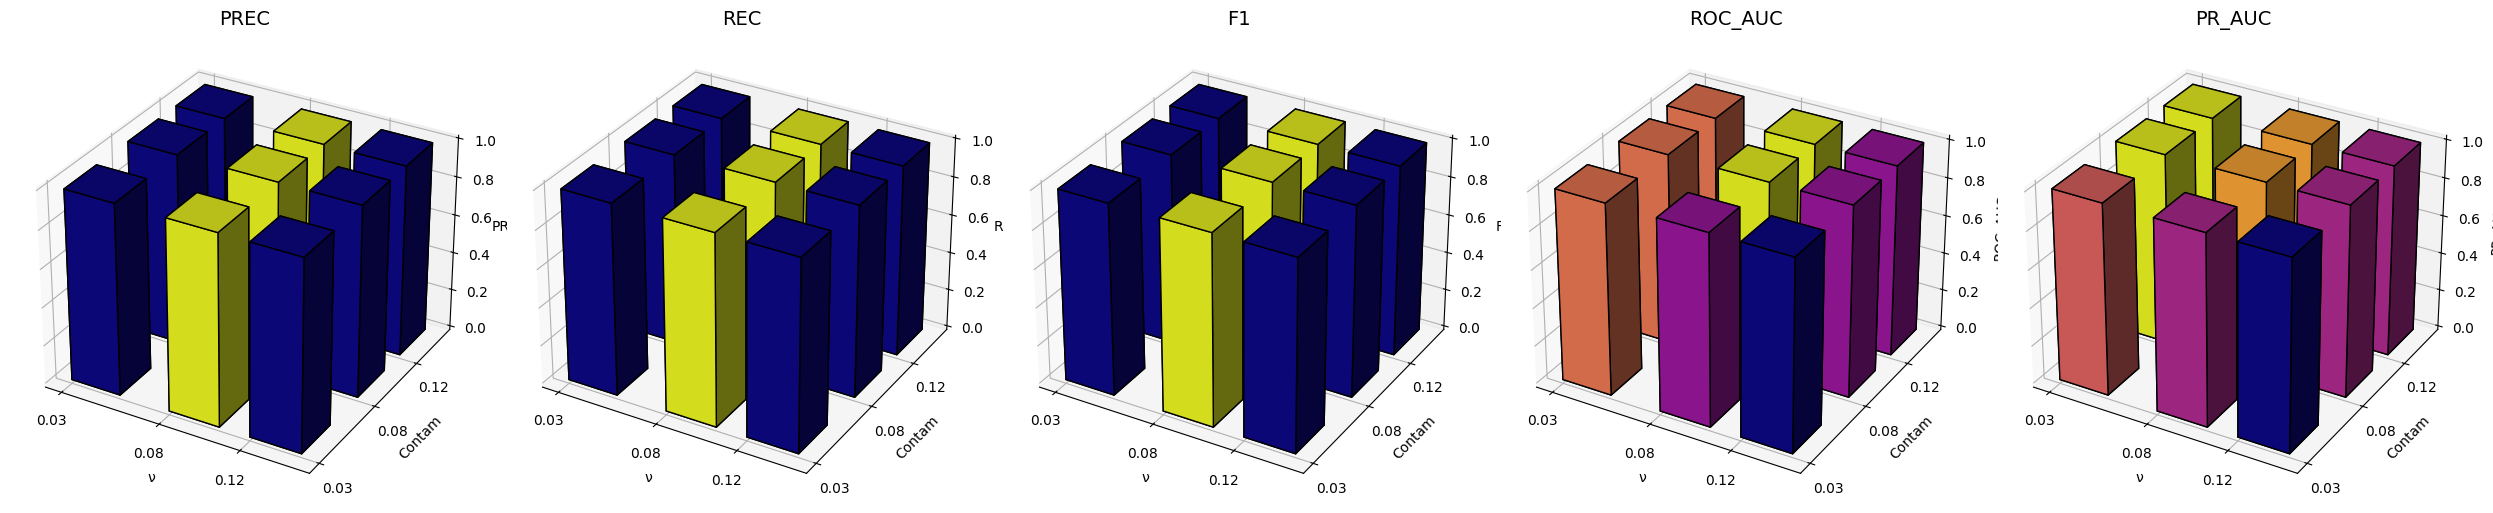

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data
df = pd.DataFrame({
    "Contam":[0.03,0.03,0.03,0.08,0.08,0.08,0.12,0.12,0.12],
    "nu":[0.03,0.08,0.12,0.03,0.08,0.12,0.03,0.08,0.12],
    "PREC":[0.992,0.993,0.992,0.992,0.993,0.992,0.992,0.993,0.992],
    "REC":[0.992,0.993,0.992,0.992,0.993,0.992,0.992,0.993,0.992],
    "F1":[0.992,0.993,0.992,0.992,0.993,0.992,0.992,0.993,0.992],
    "ROC_AUC":[0.99954,0.99953,0.99952,0.99954,0.99955,0.99953,0.99954,0.99955,0.99953],
    "PR_AUC":[0.99951,0.99950,0.99948,0.99953,0.99952,0.99950,0.99953,0.99952,0.99950]
})

metrics = ["PREC","REC","F1","ROC_AUC","PR_AUC"]

# unique sorted contamination and nu values
contams = sorted(df["Contam"].unique())
nus = sorted(df["nu"].unique())

X, Y = np.meshgrid(nus, contams)

fig = plt.figure(figsize=(25,5))

for idx, metric in enumerate(metrics):
    ax = fig.add_subplot(1,5,idx+1, projection='3d')

    Z = np.zeros_like(X, dtype=float)
    for i,c in enumerate(contams):
        for j,n in enumerate(nus):
            Z[i,j] = df[(df["Contam"]==c) & (df["nu"]==n)][metric].iloc[0]

    xs = X.flatten()
    ys = Y.flatten()
    zs = np.zeros_like(xs)
    dz = Z.flatten()

    dx = dy = 0.025

    # color mapping
    norm = (dz - dz.min()) / (dz.max() - dz.min() + 1e-9)
    colors = plt.cm.plasma(norm)

    ax.bar3d(xs, ys, zs, dx, dy, dz, color=colors, edgecolor='black', shade=True)

    ax.set_title(metric, fontsize=14)
    ax.set_xlabel("ν")
    ax.set_ylabel("Contam")
    ax.set_zlabel(metric)

    ax.set_xticks(nus)
    ax.set_yticks(contams)

plt.tight_layout()
plt.show()


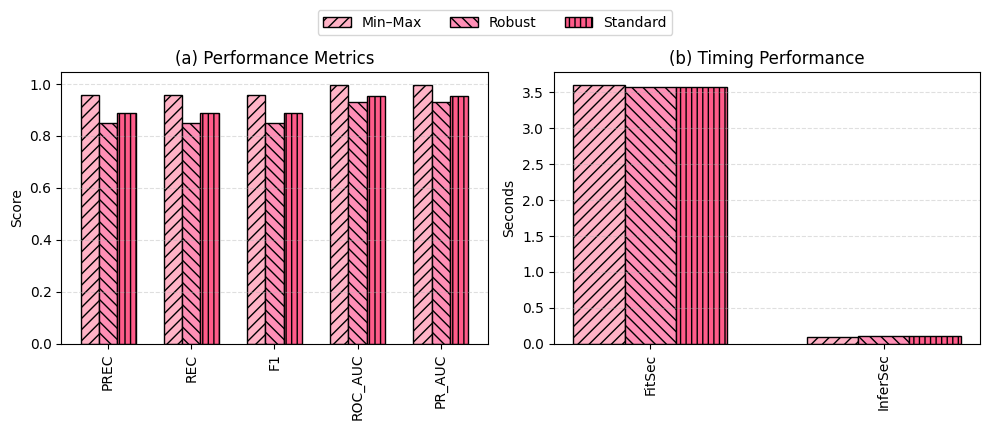

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Input table data
df = pd.DataFrame({
    "Scaler":["Min–Max","Robust","Standard"],
    "FitSec":[3.60,3.57,3.57],
    "InferSec":[0.099,0.106,0.111],
    "ACC":[0.958,0.851,0.888],
    "PREC":[0.958,0.851,0.888],
    "REC":[0.959,0.851,0.888],
    "ROC_AUC":[0.995,0.929,0.955],
    "PR_AUC":[0.995,0.929,0.955]
})

# Metrics
perf_metrics = ["PREC","REC","F1","ROC_AUC","PR_AUC"]
# F1 equals PREC values? F1 missing: compute average of PREC and REC
df["F1"] = (df["PREC"] + df["REC"]) / 2

time_metrics = ["FitSec","InferSec"]

# Styling
pink_colors = ["#ffb3c6", "#ff8fb6", "#ff5c8a"]
hatches = ["///", "\\\\\\", "|||"]
width = 0.22

fig, axes = plt.subplots(1,2,figsize=(10,4))

# ------- (a) Performance -------
ax = axes[0]
x = np.arange(len(perf_metrics))

for i, scaler in enumerate(df["Scaler"]):
    ax.bar(
        x + i*width,
        df.loc[df["Scaler"]==scaler, perf_metrics].values[0],
        width=width,
        color=pink_colors[i],
        hatch=hatches[i],
        edgecolor="black",
        label=scaler
    )

ax.set_xticks(x + width)
ax.set_xticklabels(perf_metrics, rotation=90)
ax.set_ylabel("Score")
ax.set_title("(a) Performance Metrics")
ax.grid(axis="y", linestyle="--", alpha=0.4)

# ------- (b) Timing -------
ax2 = axes[1]
x2 = np.arange(len(time_metrics))

for i, scaler in enumerate(df["Scaler"]):
    ax2.bar(
        x2 + i*width,
        df.loc[df["Scaler"]==scaler, time_metrics].values[0],
        width=width,
        color=pink_colors[i],
        hatch=hatches[i],
        edgecolor="black"
    )

ax2.set_xticks(x2 + width)
ax2.set_xticklabels(time_metrics, rotation=90)
ax2.set_ylabel("Seconds")
ax2.set_title("(b) Timing Performance")
ax2.grid(axis="y", linestyle="--", alpha=0.4)

# ------- Legend above the figure -------
fig.legend(df["Scaler"], loc="upper center", ncol=3, frameon=True, bbox_to_anchor=(0.5, 1.08))

plt.tight_layout()
plt.show()


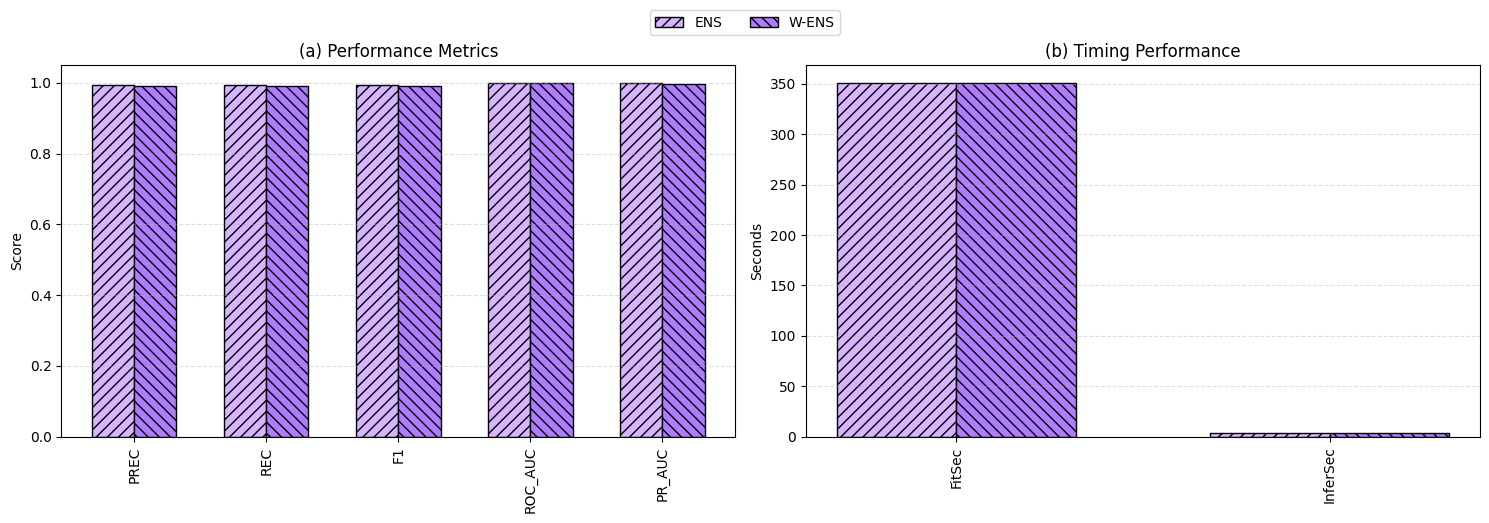

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Table data
df = pd.DataFrame({
    "Model":["ENS","W-ENS"],
    "PREC":[0.9925,0.9920],
    "REC":[0.9925,0.9920],
    "F1":[0.9925,0.9920],
    "ROC_AUC":[0.9993,0.9986],
    "PR_AUC":[0.9993,0.9977],
    "FitSec":[350.72,350.72],
    "InferSec":[3.64,3.64]
})

perf_metrics = ["PREC","REC","F1","ROC_AUC","PR_AUC"]
time_metrics = ["FitSec","InferSec"]

purple_colors = ["#d7b4ff", "#b07cff"]
hatches = ["///", "\\\\\\"]

width = 0.32

fig, axes = plt.subplots(1,2, figsize=(15,5))

# Performance subplot
ax = axes[0]
x = np.arange(len(perf_metrics))
for i, model in enumerate(df["Model"]):
    ax.bar(
        x + i*width,
        df.loc[df["Model"]==model, perf_metrics].values[0],
        width=width,
        color=purple_colors[i],
        hatch=hatches[i],
        edgecolor="black",
        label=model
    )
ax.set_xticks(x + width/2)
ax.set_xticklabels(perf_metrics, rotation=90)
ax.set_ylabel("Score")
ax.set_title("(a) Performance Metrics")
ax.grid(axis="y", linestyle="--", alpha=0.4)

# Timing subplot
ax2 = axes[1]
x2 = np.arange(len(time_metrics))
for i, model in enumerate(df["Model"]):
    ax2.bar(
        x2 + i*width,
        df.loc[df["Model"]==model, time_metrics].values[0],
        width=width,
        color=purple_colors[i],
        hatch=hatches[i],
        edgecolor="black"
    )
ax2.set_xticks(x2 + width/2)
ax2.set_xticklabels(time_metrics, rotation=90)
ax2.set_ylabel("Seconds")
ax2.set_title("(b) Timing Performance")
ax2.grid(axis="y", linestyle="--", alpha=0.4)

# Legend above
fig.legend(df["Model"], loc="upper center", ncol=2, frameon=True, bbox_to_anchor=(0.5,1.05))

plt.tight_layout()
plt.show()


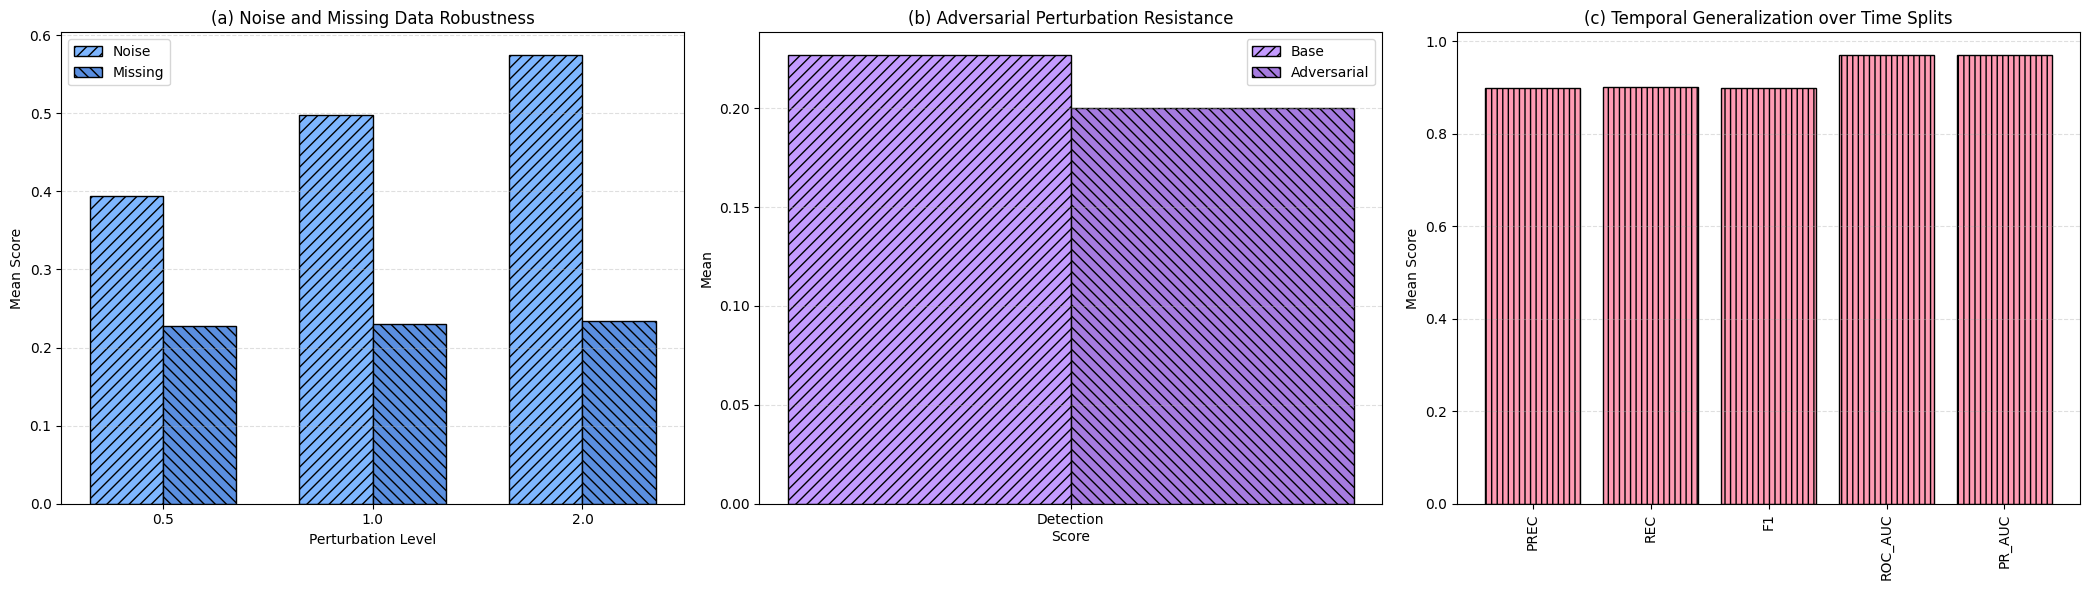

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ----------- TABLE 1 (Noise/Missing) -----------
df1 = pd.DataFrame({
    "Test Type":["Noise","Noise","Noise","Missing","Missing","Missing"],
    "Level":[0.5,1.0,2.0,0.01,0.05,0.10],
    "Mean Score":[0.394,0.498,0.575,0.228,0.230,0.234]
})

# ----------- TABLE 2 (Adversarial) -----------
df2 = pd.DataFrame({
    "Metric":["Detection Score"],
    "Base":[0.227],
    "Adv":[0.200]
})

# ----------- TABLE 3 (Temporal Generalization) -----------
df3 = pd.DataFrame({
    "Fold":[1,2,3,4,5],
    "PREC":[0.917,0.901,0.908,0.880,0.893],
    "REC":[0.918,0.904,0.909,0.880,0.893],
    "F1":[0.918,0.902,0.908,0.880,0.893],
    "ROC_AUC":[0.975,0.974,0.976,0.962,0.968],
    "PR_AUC":[0.975,0.974,0.976,0.962,0.968]
})

# Color scheme (EXACTLY three distinct shades)
blue = "#7eb6ff"
purple = "#c49bff"
pink = "#ff9bb3"

hatches = ["///", "\\\\\\", "|||"]

fig, axes = plt.subplots(1,3, figsize=(21,6))


# ---------- (a) FIRST GRAPH: BLUE THEME ----------
ax = axes[0]

noise = df1[df1["Test Type"]=="Noise"]
missing = df1[df1["Test Type"]=="Missing"]

x = np.arange(len(noise))
width = 0.35

ax.bar(x, noise["Mean Score"], width, color=blue, hatch=hatches[0], edgecolor='black', label="Noise")
ax.bar(x + width, missing["Mean Score"].values[:len(x)], width, color="#5a8fe0", hatch=hatches[1], edgecolor='black', label="Missing")

ax.set_xticks(x + width/2)
ax.set_xticklabels(noise["Level"])
ax.set_xlabel("Perturbation Level")
ax.set_ylabel("Mean Score")
ax.set_title("(a) Noise and Missing Data Robustness")
ax.grid(axis="y", linestyle="--", alpha=0.4)
ax.legend()


# ---------- (b) SECOND GRAPH: PURPLE THEME ----------
ax = axes[1]

x2 = np.arange(1)
ax.bar(x2, df2["Base"], width, color=purple, hatch=hatches[0], edgecolor='black', label="Base")
ax.bar(x2 + width, df2["Adv"], width, color="#a67be0", hatch=hatches[1], edgecolor='black', label="Adversarial")

ax.set_xticks(x2 + width/2)
ax.set_xticklabels(["Detection\nScore"])
ax.set_ylabel("Mean")
ax.set_title("(b) Adversarial Perturbation Resistance")
ax.grid(axis="y", linestyle="--", alpha=0.4)
ax.legend()


# ---------- (c) THIRD GRAPH: PINK THEME ----------
ax = axes[2]

metrics = ["PREC","REC","F1","ROC_AUC","PR_AUC"]
x3 = np.arange(len(metrics))

means = [df3[m].mean() for m in metrics]

ax.bar(x3, means, color=pink, hatch=hatches[2], edgecolor='black')

ax.set_xticks(x3)
ax.set_xticklabels(metrics, rotation=90)
ax.set_ylabel("Mean Score")
ax.set_title("(c) Temporal Generalization over Time Splits")
ax.grid(axis="y", linestyle="--", alpha=0.4)


plt.tight_layout()
plt.show()


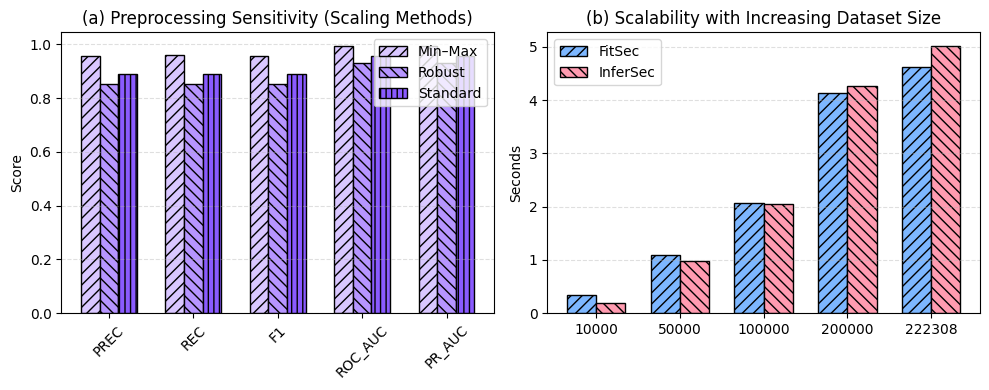

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------------
# PREPROCESSING SENSITIVITY TABLE
# -------------------------------------------------------------
df_scaler = pd.DataFrame({
    "Scaler":["Min–Max","Robust","Standard"],
    "FitSec":[3.60,3.57,3.57],
    "InferSec":[0.099,0.106,0.111],
    "PREC":[0.958,0.851,0.888],
    "REC":[0.959,0.851,0.888],
    "ROC_AUC":[0.995,0.929,0.955],
    "PR_AUC":[0.995,0.929,0.955]
})

metrics = ["PREC","REC","F1","ROC_AUC","PR_AUC"]
df_scaler["F1"] = (df_scaler["PREC"] + df_scaler["REC"]) / 2

# -------------------------------------------------------------
# SCALABILITY TABLE
# -------------------------------------------------------------
df_scalability = pd.DataFrame({
    "N":[10000,50000,100000,200000,222308],
    "FitSec":[0.335,1.100,2.075,4.129,4.626],
    "InferSec":[0.201,0.974,2.055,4.261,5.019]
})

# -------------------------------------------------------------
# COLORS + HATCHES (IEEE STYLE)
# -------------------------------------------------------------
blue = "#7db7ff"
pink = "#ff9bb0"
purple = ["#d9c7ff", "#b695ff", "#8a5bff"]

hatches = ["///","\\\\\\","|||"]

# -------------------------------------------------------------
# CREATE FIGURE
# -------------------------------------------------------------
fig, axes = plt.subplots(1,2, figsize=(10,4))


# =============================================================
# (a) PREPROCESSING SENSITIVITY (Grouped Bar Chart)
# =============================================================
ax = axes[0]

x = np.arange(len(metrics))
width = 0.22

for i, scaler in enumerate(df_scaler["Scaler"]):
    ax.bar(
        x + i*width,
        df_scaler.loc[df_scaler["Scaler"]==scaler, metrics].values[0],
        width=width,
        color=purple[i],
        hatch=hatches[i],
        edgecolor="black",
        label=scaler
    )

ax.set_xticks(x + width)
ax.set_xticklabels(metrics, rotation=45)
ax.set_ylabel("Score")
ax.set_title("(a) Preprocessing Sensitivity (Scaling Methods)", fontsize=12)
ax.grid(axis="y", linestyle="--", alpha=0.4)
ax.legend()


# =============================================================
# (b) SCALABILITY (IEEE-STYLE Grouped Bar Chart)
# =============================================================
ax2 = axes[1]

x2 = np.arange(len(df_scalability["N"]))
width2 = 0.35

ax2.bar(x2, df_scalability["FitSec"], width2,
        color=blue, hatch="///", edgecolor="black", label="FitSec")
ax2.bar(x2 + width2, df_scalability["InferSec"], width2,
        color=pink, hatch="\\\\\\", edgecolor="black", label="InferSec")

ax2.set_xticks(x2 + width2 / 2)
ax2.set_xticklabels(df_scalability["N"])
ax2.set_ylabel("Seconds")
ax2.set_title("(b) Scalability with Increasing Dataset Size", fontsize=12)
ax2.grid(axis="y", linestyle="--", alpha=0.4)
ax2.legend()

plt.tight_layout()
plt.show()


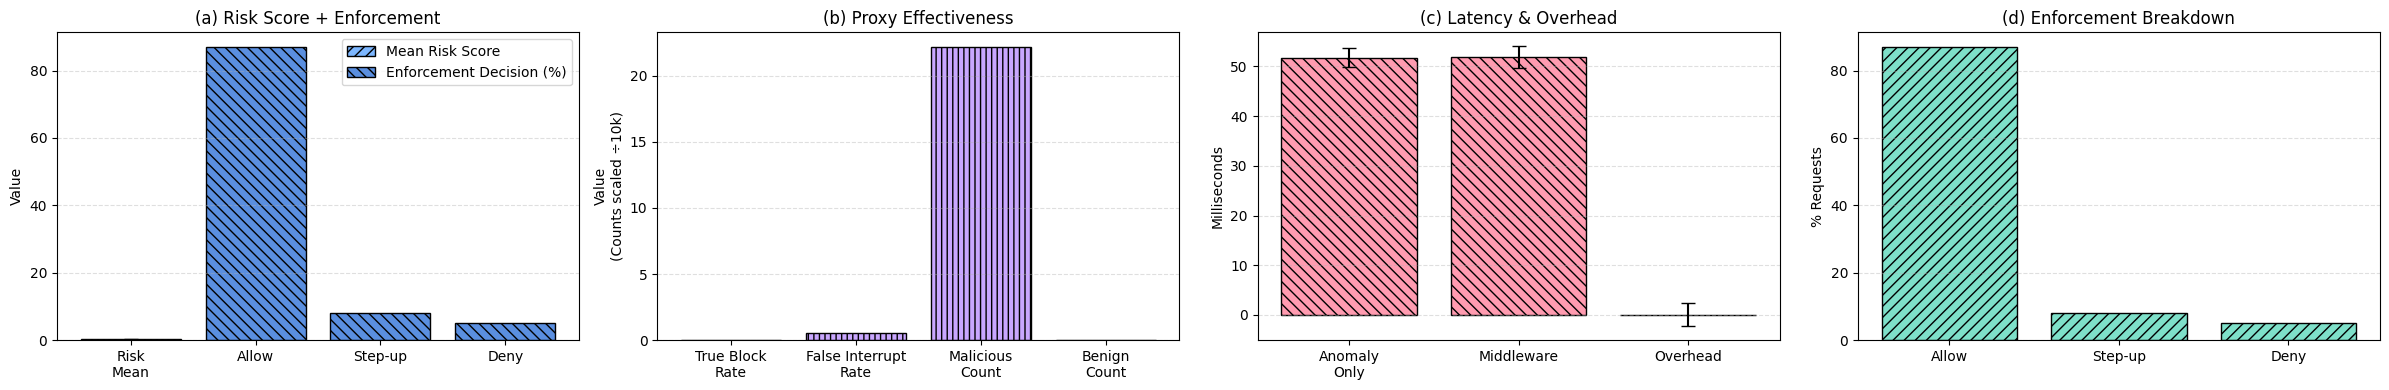

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# DATA FROM TABLES
# -----------------------------

# (a) Risk + Enforcement
risk_mean = 0.2248
risk_std = 0.1948

enf_labels = ["Allow", "Step-up", "Deny"]
enf_values = [87.0, 8.0, 5.0]

# (b) Proxy evaluation
proxy_metrics = ["True Block Rate", "False Interrupt Rate", "Malicious Count", "Benign Count"]
proxy_plot_vals = [0.0138, 0.5701, 221880/10000, 428/10000]  # scaled
proxy_scale_note = "(Counts scaled ÷10k)"

# (c) Latency + overhead
lat_metrics = ["Anomaly\nOnly", "Middleware", "Overhead"]
lat_means = [51.77, 51.85, 0.083]
lat_stds = [1.88, 2.20, 2.32]

# (d) Enforcement breakdown only (new 4th subplot)
enf_xticks2 = ["Allow", "Step-up", "Deny"]

# -----------------------------
# COLORS (Blue, Purple, Pink IEEE style)
# -----------------------------
blue  = "#7db7ff"
purple = "#c9a7ff"
pink = "#ff9bb0"
teal = "#7ee0c9"   # new color for panel (d)

hatches = ["///","\\\\\\","|||"]

# -----------------------------
# PLOT (1×4)
# -----------------------------
fig, axes = plt.subplots(1,4, figsize=(24,4))

# =======================================================
# (a) Risk Score + Enforcement (BLUE)
# =======================================================
ax = axes[0]

# risk score bar
ax.bar(0, risk_mean, yerr=risk_std, color=blue, edgecolor="black", hatch=hatches[0], capsize=5, label="Mean Risk Score")

# enforcement distribution
x2 = np.arange(1, 1+len(enf_values))
ax.bar(x2, enf_values, color="#5a8fe0", edgecolor="black", hatch=hatches[1], label="Enforcement Decision (%)")

ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["Risk\nMean", "Allow", "Step-up", "Deny"])
ax.set_ylabel("Value")
ax.set_title("(a) Risk Score + Enforcement")
ax.grid(axis="y", linestyle="--", alpha=0.4)
ax.legend()

# =======================================================
# (b) Proxy Evaluation + Effectiveness (PURPLE)
# =======================================================
ax = axes[1]
x = np.arange(len(proxy_plot_vals))

proxy_xticks = ["True Block\nRate",
                "False Interrupt\nRate",
                "Malicious\nCount",
                "Benign\nCount"]

ax.bar(x, proxy_plot_vals, color=purple, edgecolor="black", hatch=hatches[2])
ax.set_xticks(x)
ax.set_xticklabels(proxy_xticks)
ax.set_title("(b) Proxy Effectiveness")
ax.set_ylabel("Value\n" + proxy_scale_note)
ax.grid(axis="y", linestyle="--", alpha=0.4)

# =======================================================
# (c) Latency and Middleware Overhead (PINK)
# =======================================================
ax = axes[2]
x = np.arange(len(lat_means))

lat_xticks = ["Anomaly\nOnly", "Middleware", "Overhead"]

ax.bar(x, lat_means, yerr=lat_stds, color=pink, edgecolor="black", hatch=hatches[1], capsize=5)
ax.set_xticks(x)
ax.set_xticklabels(lat_xticks)
ax.set_ylabel("Milliseconds")
ax.set_title("(c) Latency & Overhead")
ax.grid(axis="y", linestyle="--", alpha=0.4)

# =======================================================
# (d) Enforcement Breakdown (TEAL)
# =======================================================
ax = axes[3]

ax.bar(np.arange(3), enf_values, color=teal, edgecolor="black", hatch=hatches[0])
ax.set_xticks(np.arange(3))
ax.set_xticklabels(["Allow", "Step-up", "Deny"])
ax.set_ylabel("% Requests")
ax.set_title("(d) Enforcement Breakdown")
ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


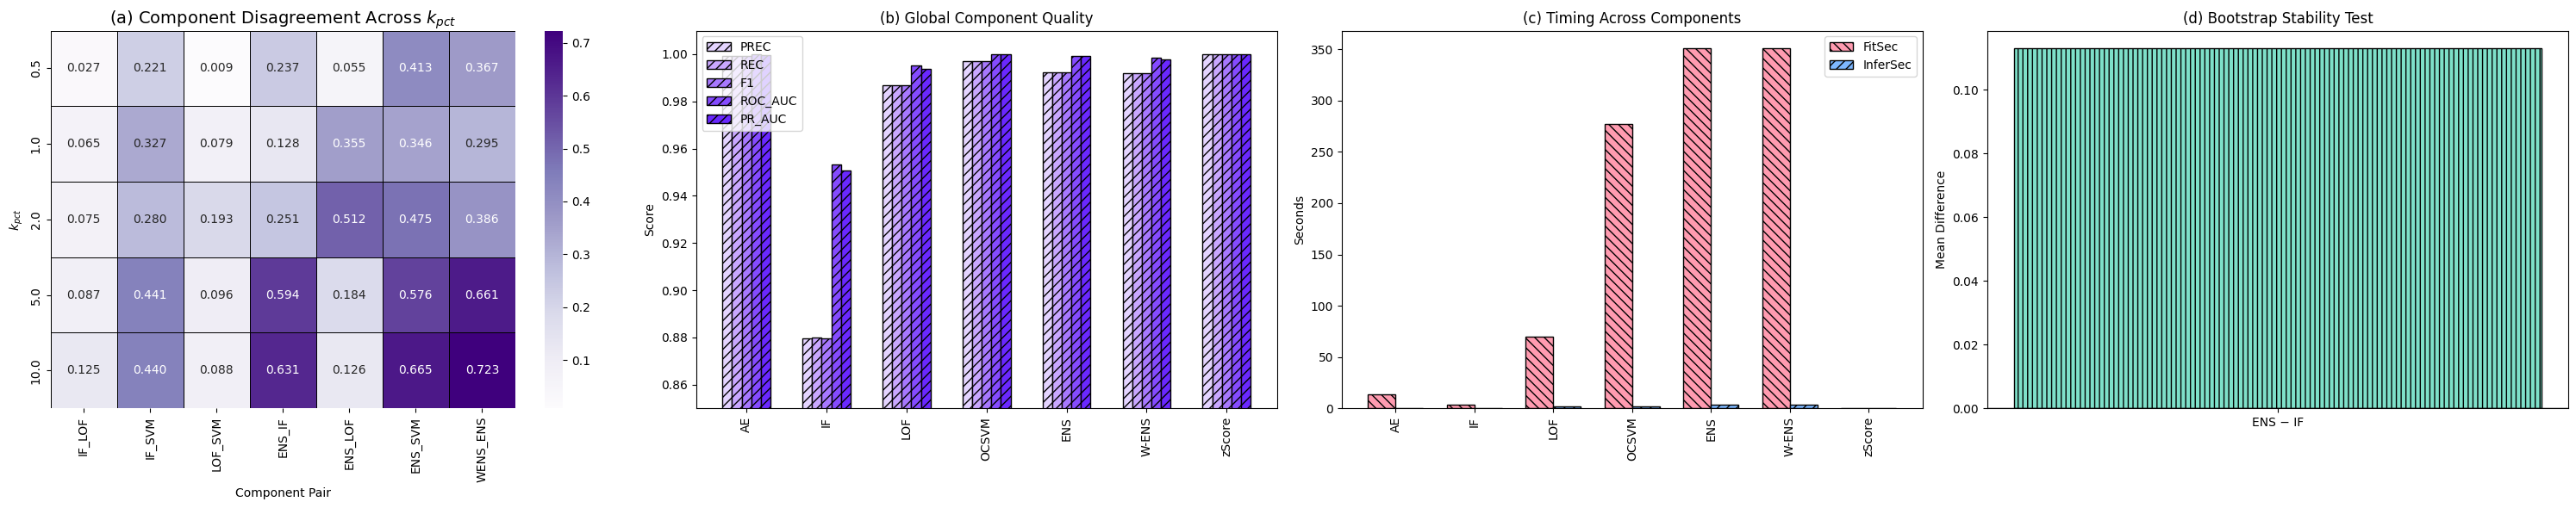

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# ================================
# TABLE A10 — DISAGREEMENT MATRIX
# ================================
df_disagree = pd.DataFrame({
    "k_pct":[0.5,1,2,5,10],
    "IF_LOF":[0.027,0.065,0.075,0.087,0.125],
    "IF_SVM":[0.221,0.327,0.280,0.441,0.440],
    "LOF_SVM":[0.009,0.079,0.193,0.096,0.088],
    "ENS_IF":[0.237,0.128,0.251,0.594,0.631],
    "ENS_LOF":[0.055,0.355,0.512,0.184,0.126],
    "ENS_SVM":[0.413,0.346,0.475,0.576,0.665],
    "WENS_ENS":[0.367,0.295,0.386,0.661,0.723]
})
df_heat = df_disagree.set_index("k_pct")

# ================================
# TABLE A18 — GLOBAL PERFORMANCE
# ================================
df_global = pd.DataFrame({
    "Model":["AE","IF","LOF","OCSVM","ENS","W-ENS","zScore"],
    "PREC":[0.9992,0.8798,0.9867,0.9970,0.9925,0.9920,1.0000],
    "REC":[0.9992,0.8799,0.9867,0.9970,0.9925,0.9920,1.0000],
    "F1":[0.9992,0.8798,0.9867,0.9970,0.9925,0.9920,1.0000],
    "ROC_AUC":[0.9999,0.9534,0.9954,0.9999,0.9993,0.9986,1.0000],
    "PR_AUC":[0.9996,0.9508,0.9937,0.9999,0.9993,0.9977,1.0000],
    "FitSec":[13.67,3.65,69.45,277.62,350.72,350.72,0.00],
    "InferSec":[0.0028,0.106,1.47,2.07,3.64,3.64,0.019]
})
metrics = ["PREC","REC","F1","ROC_AUC","PR_AUC"]

# ================================
# TABLE A20 — BOOTSTRAP TEST
# ================================
mean_diff = 0.113
pvalue = 0.0005

# ================================
# COLORS
# ================================
purple_scale = ["#e4d4ff","#c9a7ff","#a778ff","#854bff","#6a28ff"]
pink = "#ff9bb0"
teal = "#7ee0c9"
blue = "#7db7ff"

# ================================
# FIGURE — NEW ORDER 1×4
# ================================
fig, axes = plt.subplots(1,4, figsize=(30,6))

# ---------------------------------------------------------
# (a) Heatmap — Disagreement Across k_pct
# ---------------------------------------------------------
ax = axes[0]
sns.heatmap(df_heat, cmap="Purples", annot=True, fmt=".3f",
            cbar=True, linewidths=0.5, linecolor="black", ax=ax)
ax.set_title("(a) Component Disagreement Across $k_{pct}$", fontsize=14)
ax.set_xlabel("Component Pair")
ax.set_ylabel("$k_{pct}$")

# ---------------------------------------------------------
# (b) Global Component Quality — Multi-metric Bars
# ---------------------------------------------------------
ax = axes[1]
x = np.arange(len(df_global["Model"]))
width = 0.12

for i, m in enumerate(metrics):
    ax.bar(x + i*width, df_global[m], width,
           label=m, edgecolor="black", hatch="///", color=purple_scale[i])

ax.set_xticks(x + width*2)
ax.set_xticklabels(df_global["Model"], rotation=90)
ax.set_ylim(0.85,1.01)
ax.set_ylabel("Score")
ax.set_title("(b) Global Component Quality")
ax.legend()

# ---------------------------------------------------------
# (c) Timing Across Components — FitSec + InferSec
# ---------------------------------------------------------
ax = axes[2]
x = np.arange(len(df_global["Model"]))
width = 0.35

ax.bar(x - width/2, df_global["FitSec"], width,
       color=pink, edgecolor="black", hatch="\\\\\\", label="FitSec")
ax.bar(x + width/2, df_global["InferSec"], width,
       color=blue, edgecolor="black", hatch="///", label="InferSec")

ax.set_xticks(x)
ax.set_xticklabels(df_global["Model"], rotation=90)
ax.set_ylabel("Seconds")
ax.set_title("(c) Timing Across Components")
ax.legend()

# ---------------------------------------------------------
# (d) Bootstrap Stability — Effect Size Bar (LAST)
# ---------------------------------------------------------
ax = axes[3]

ax.bar(0, mean_diff, color=teal, edgecolor="black", hatch="|||")
ax.axhline(0, color="black", linewidth=1)

ax.set_xticks([0])
ax.set_xticklabels(["ENS − IF"])
ax.set_ylabel("Mean Difference")
ax.set_title("(d) Bootstrap Stability Test")
#ax.text(0, mean_diff + 0.005, f"p = {pvalue}", ha="center", fontsize=12)

plt.tight_layout()
plt.show()
